<a href="https://colab.research.google.com/github/forouzankhalili/price-prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First five entries in the dataset:
      Location  Size_sqft  Bedrooms  Bathrooms   Price
0  Los Angeles       3599         1          2  489957
1        Miami        700         1          2  284078
2      Chicago       3604         4          2  457429
3        Miami       2954         4          1  561243
4        Miami       4145         3          3  213632


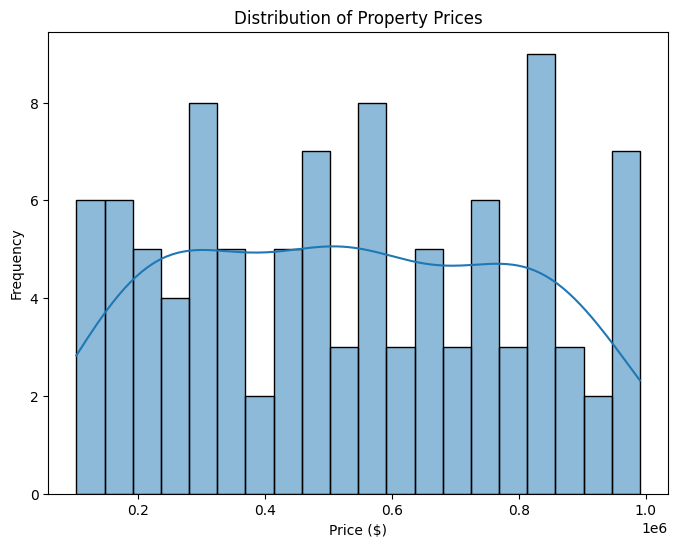

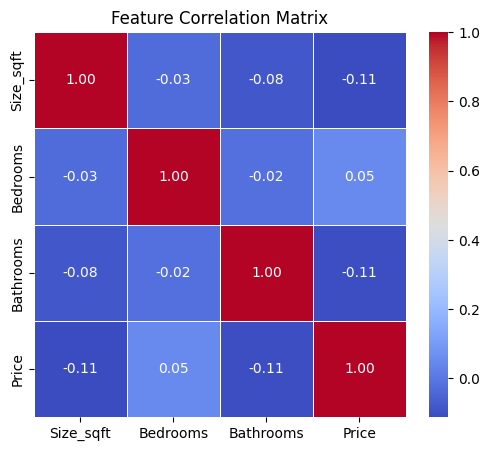

Model Evaluation Metrics:
Mean Absolute Error: 268396.34
Mean Squared Error: 88607080416.39
R² Score: -0.11


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generating a synthetic real estate dataset
np.random.seed(42)
n_samples = 100
data = {
    'Location': np.random.choice(['New York', 'San Francisco', 'Chicago', 'Los Angeles', 'Miami'], n_samples),
    'Size_sqft': np.random.randint(500, 5000, n_samples),
    'Bedrooms': np.random.randint(1, 5, n_samples),
    'Bathrooms': np.random.randint(1, 4, n_samples),
    'Price': np.random.randint(100000, 1000000, n_samples)
}

df = pd.DataFrame(data)

# Display dataset sample
print("First five entries in the dataset:")
print(df.head())

# Exploratory Data Analysis
plt.figure(figsize=(8,6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

# Correlation Analysis
numeric_features = ['Size_sqft', 'Bedrooms', 'Bathrooms', 'Price']
corr_matrix = df[numeric_features].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

# Data Preprocessing
X = df[['Size_sqft', 'Bedrooms', 'Bathrooms']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# Model Evaluation
metrics = {
    'Mean Absolute Error': mean_absolute_error(y_test, y_pred),
    'Mean Squared Error': mean_squared_error(y_test, y_pred),
    'R² Score': r2_score(y_test, y_pred)
}

# Display results
print("Model Evaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")